Computer Vision: Area & Centroids using contours in OpenCV & Python

YT : https://www.youtube.com/watch?v=6AY5p1uC5gM

Depending on your fiducial you can use different methods. A very common method, already implemented in OpenCV is SIFT, which finds scale invariant robust points in an image. The way to proceed is:

Run SIFT on your fiducial offline. This generates keypoints to be tracked.

Run SIFT real-time (or FAST, which can also generate SIFT descriptors) to find keypoints in the scene.

Use a matcher (FLANN matcher, for example) to find which keypoints found in the image correspong to the fiducial.

Run findhomography() for matched points. From the found homography H matrix 3x3, you can obtain the camera pose.

In [2]:
import cv2
import numpy as np
import imutils

In [ ]:

_, frame = cap.read()
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # to find contours

lower_blue = np.array([90, 60, 0])
upper_blue = np.array([121, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


for c in cnts:

    area = cv2.contourArea(c)

    cv2.drawContours(frame, [c], -1, (0, 255, 0), 2)
    # to find centroids, we look for the moments
    M = cv2.moments(c)

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    cv2.circle(frame, (cx, cy), 7, (255, 255, 255), -1)
    cv2.putText(frame, "centroid", (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)


    cv2.imshow('frame', frame)

print('area is ...', area)
print('centroid is ...', cx, cy)

k = cv2.waitKey(1000)




Buscar objetos en Imagen:

YT: https://www.youtube.com/watch?v=yh_nRTkh9xo

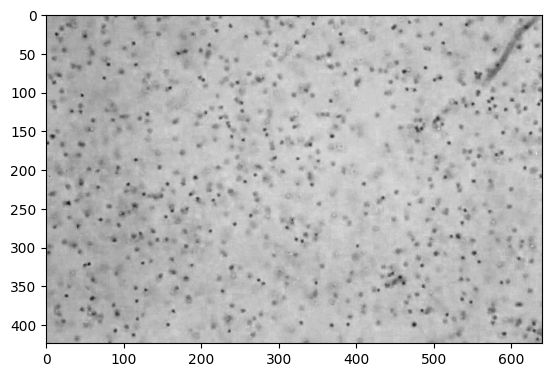

In [1]:
import trackpy as tp
import numpy as np
import pandas as payload_size
from pandas import DataFrame, Series
# tp.locate

import numpy as np     
import matplotlib as mpl                     
import matplotlib.pyplot as plt 

mpl.rc('image', cmap = 'gray')

from matplotlib.image import imread 

import pims

def gray(image):
    return image[:, :, 1]


frame = gray(imread('bulk_water_151.png'))
plt.imshow(frame)

In [ ]:
# SEGMENTING IMAGE
# locating particles of average size of block, 
# invert since background is white  

f = tp.locate(frame, 11, invert=True)

tp. annotate(f, frame)

NameError: name 'f' is not defined

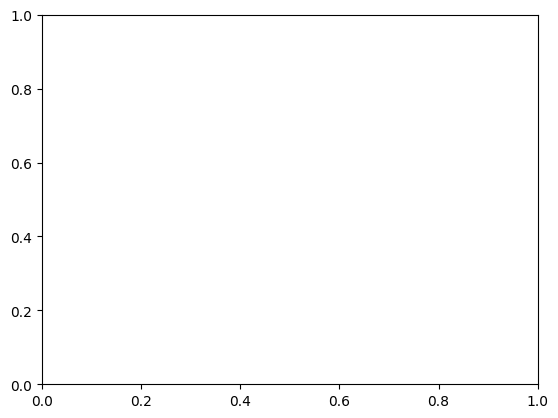

In [2]:
# We don't want the ones out of focus

fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

ax.set(xlabel='mass', ylabel='count')

#  Filter based of mass

f = tp.locate(frame, 11, invert=True, minmass=0.5)
tp.annotate(f, frame)